In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# N=900000
# N_TEST=100000
# BlockCount=[10000]
# BlockCount_TEST=[20000]
# NN_est=[100, 200, 300, 400]
# seed=1
# append_str='_RealDataset'
# DIR = '../log/RealDataset_mini'
# fig_tag="mini"
# NN_pred=[200, 400, 600]

N=45000000
N_TEST=5000000
BlockCount=[450000]
BlockCount_TEST=[50000]
NN_est=[100, 200, 400]
seed=42
append_str='_RealDataset_prediction'
DIR = '../log/RealDataset'
fig_tag="full"
NN_pred=[200, 400, 600]

DIM=10

rmspe_array = []
params_array = []
# Read the CSV file
for i in range(len(BlockCount)):
    for j in range(len(NN_est)):
        df_array = pd.read_csv(f'{DIR}/logFile_numPointsTotal{N}_numBlocksTotal{BlockCount[i]}_m{NN_est[j]}_seed{seed}_isScaled1{append_str}.csv')
        theta_array = pd.read_csv(f'{DIR}/theta_numPointsTotal{N}_numBlocksTotal{BlockCount[i]}_m{NN_est[j]}_seed{seed}_isScaled1{append_str}.csv')
        rmspe_array.append(df_array['rmspe'].values)
        params_array.append(theta_array.iloc[0, 2:12].values)

print(rmspe_array)
print(params_array)

[array([ 2.16450807,  1.99524641, 50.17195735]), array([ 2.19610205,  2.02507745, 50.53773897]), array([ 2.24301668,  2.04732377, 50.57025462])]
[array([4.81675e-01, 1.37950e-01, 1.01560e+00, 4.59350e-01, 2.07991e+00,
       8.30448e-01, 3.45533e-02, 5.09984e+01, 2.00000e+02, 5.07473e-01]), array([2.69754e-01, 1.05089e-01, 1.02622e+00, 3.09053e-01, 1.79639e+00,
       7.64031e-01, 2.15902e-02, 5.07942e+01, 1.46003e+03, 4.32493e-01]), array([2.51704e-01, 1.04049e-01, 8.88848e-01, 2.99718e-01, 1.59919e+00,
       6.84287e-01, 1.49068e-02, 5.28579e+01, 1.46003e+04, 4.06936e-01])]


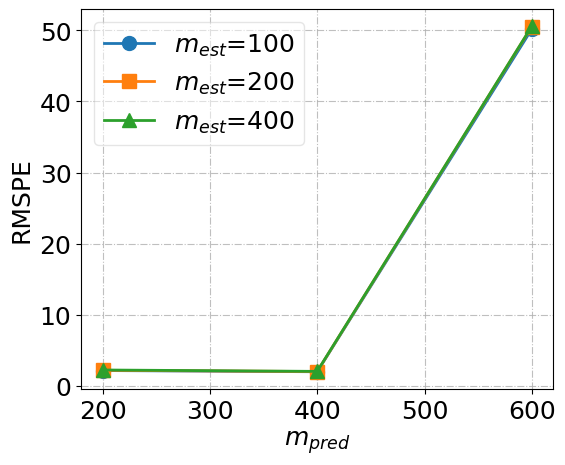

In [32]:
import matplotlib.pyplot as plt 

# Set default font size
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Different styles for each line
styles = {
    'colors': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],  # More distinct colors
    'markers': ['o', 's', '^', 'D'],  # Circle, Square, Triangle, Diamond
    'linestyles': ['-', '--', '-.', ':']  # Solid, Dashed, Dashdot, Dotted
}

for i, nn_est in enumerate(NN_est):
    plt.plot(NN_pred, rmspe_array[i], 
             marker=styles['markers'][i],
            #  linestyle=styles['linestyles'][i],
             color=styles['colors'][i],
             label=r'$m_{est}$='+str(nn_est),
             markersize=10,
             linewidth=2)

plt.xlabel(r'$m_{pred}$')
plt.ylabel('RMSPE')
# plt.title('RMSPE vs NN_pred for different NN_est values')
plt.legend(framealpha=0.5)
plt.grid(True, ls="-.", alpha=0.8)
plt.tight_layout()
plt.savefig(f'./fig/real_dataset_{fig_tag}_rmspe.pdf')
plt.show()

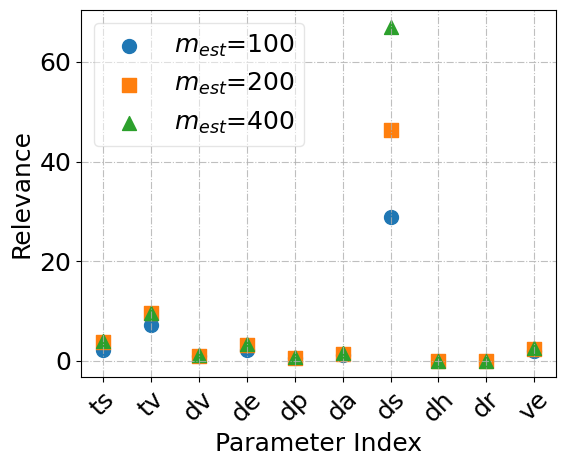

In [33]:
import matplotlib.pyplot as plt 

plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6, 5))

# Different styles for each line
styles = {
    'colors': ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],  # More distinct colors
    'markers': ['o', 's', '^', 'D'],  # Circle, Square, Triangle, Diamond
}

# Parameter names
param_names = ['ts', 'tv', 'dv', 'de', 'dp', 'da', 'ds', 'dh', 'dr', 've']
x_values = range(1, 11)

# Plot each theta array
for i, nn_est in enumerate(NN_est):
    plt.scatter(x_values, 1/params_array[i], 
               marker=styles['markers'][i],
               color=styles['colors'][i],
               label=r'$m_{est}$='+str(nn_est),
               s=100)

plt.xticks(x_values, param_names, rotation=45)  # Add parameter names to x-axis
plt.xlabel('Parameter Index')
plt.ylabel('Relevance')
plt.legend(framealpha=0.5)
plt.grid(True, ls="-.", alpha=0.8)
plt.tight_layout()
# plt.yscale('log')
plt.savefig(f'./fig/real_dataset_{fig_tag}_params.pdf')
plt.show()